# Homework 4

On this Homework you'll get a chance to 

1. Practice applying the definitions of probability and entropy described in class 
2. Experiment with Olshausen & Field's sparse coding model 

## Setting up the notebook

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm.notebook import tqdm
import scipy.io as sio
import os

# Importing functions from class
from OF import *

http://www.rctn.org/bruno/sparsenet/IMAGES.mat has already been downloaded.
http://www.rctn.org/bruno/sparsenet/IMAGES_RAW.mat has already been downloaded.
https://dz2cdn1.dzone.com/storage/temp/3542733-printed-circuit-boards.jpg has already been downloaded.
...all downloads complete.
Importing natural_imgs, natural_imgs_raw, circuit_imgs_raw.


## Question 1: Probability Definitions

Below is a joint probability distribution for the chance of rain ($R$) and the cloudiness ($C$) on any given day in the spring in Pittsburgh. For simplicity we are considering each as binary:

$$
\begin{align}
    R & = \{\textrm{no rain}, \textrm{rain}\} \\
    C & = \{\textrm{sunny}, \textrm{cloudy}\} \\
\end{align}
$$

Below is a table of values for $p(R, S)$:

| $R \backslash C$  | $\textrm{sunny}$ |  $\textrm{cloudy}$ |
|:------:|:----------------:|:------------------:|
| $\textrm{no rain}$ | 0.3 | 0.2 |
| $\textrm{rain}$ | 0.1 | 0.4 |


### 1.1 

In class, we discussed how all probability distributions are _implicity_ conditional distributions. What are some of the unwritten variables we are conditioning on here? 

_Type your answer here or include as a seperate scan_

### 1.2 

Calculate the marginal probabilities of rain ($p(R)$, two values) and cloudiness ($p(C)$, two values). Based on these values does $R$ appear to be _statsitically independent_ of $S$?

_Type your answer here or include as a seperate scan_

### 1.3

Calculate the _conditional_ probability distribution $p(R|C)$ (four values).

_Type your answer here or include as a seperate scan_

### 1.4

Use Bayes' rule and your previous answers to calculate $p(C|R)$

_Type your answer here or include as a seperate scan_

## Question 2: Intro to information Theory

In this question, you'll use the probabilty distribution from question 1 to calcualte some relevant quantities from information theory.

Recall the following expressions to calculate _entropy_ ($H(X)$, $H(X,Y)$), _conditional entropy_ ($H(X|Y)$), and the _mutual information_ ($I(X;Y)$)

$$
\begin{align}
    H(X) & = \sum_x - p(x) \log_2 p(x) \\
    H(X,Y) & = \sum_{x,y} - p(x,y) \log_2 p(x, y) \\
    H(X|Y) & = \sum_{x,y} - p(x,y) \log_2 p(x|y) \\
    I(X;Y)  & = D_{KL}(p(x,y) || p(x)p(y)) = \sum_{x,y} p(x,y) \log_2 \frac{p(x,y)}{p(x)p(y)} \\
            & = H(X) + H(Y) - H(X,Y) \\
            & = H(X) - H(X|Y) = H(Y) - H(Y|X)  
\end{align}
$$


### 2.1

Caculate the entropy of $R$ ($H(R)$) and the entropy of $C$ ($H(C)$). Before the day begins are you more uncertain about whether it will rain or whether it will be cloudy? 

_Type your answer here or include as a seperate scan_

### 2.2 

caculate the coniditional entropy of rain given you know whether it is cloudy ($H(R|C)$). Compare this to the uncertainty about whether it will rain _whithout_ knowing it is cloudy $H(R)$. Does seeing whether it is cloudy teach you anything about whether it will rain? 

_Type your answer here or include as a seperate scan_

### 2.3 

Calculate the _mutual information_ between the rain ($R$) and cloudiness ($C$) using any of the forumlas above for the mutual information. Before you use your chosen formula, interpret it. how much does knowing $C$ teach you about $R$? How much does knowing $R$ teach you about $C$?

_Type your answer here or include as a seperate scan_

## Question 3

## Question 4: O&F sparse coding model

In this question, you will get a chace to investigate the O&F model. Specifically we'll look at the role of two factors in producing the receptive fields observed. 

1. The size of the network (`num_units`)
2. The weight given to sparsity (`lmda`)


### 4.1: Side of network (`num_units`)

Generate receptive fields for networks of three sizes $n = 20, 100, 500$ and compare the results. You should keep all other constants fixed to the defaults used in class.

In [ ]:
# Default simulation constants 
patch_size = 16 # image patch size

num_iter = 500 # number of iterations
batch_size = 250 # Batch size

lmda = 5e-3 # Sparisty weight

# Image set
image_set = natural_imgs

In [12]:
# Simulation constants
num_units = 20 # number of neurons (units)

# Define model
model_20 = OlshausenField1996Model(num_inputs=patch_size**2, 
                                num_units=num_units,
                                batch_size=batch_size,
                                lmda=lmda)

In [13]:
# Run simulation
error_list = [] # List to save errors
for iter_ in tqdm(range(num_iter)):
    patches = generate_patches(image_set, patch_size, batch_size) # Generating image patches
    error = model_20.train(patches) # train model with patches 

    error_list.append(model.calculate_total_error(error))
    # Print moving average error
    if iter_ % 100 == 99:  
        print("iter: "+str(iter_+1)+"/"+str(num_iter)+", Moving error:",
              np.mean(error_list[iter_-99:iter_]))

iter: 100/500, Moving error: 0.06712372328444503
iter: 200/500, Moving error: 0.06521196309220463
iter: 300/500, Moving error: 0.06504775296723132
iter: 400/500, Moving error: 0.0651273545445652
iter: 500/500, Moving error: 0.06510604105494949



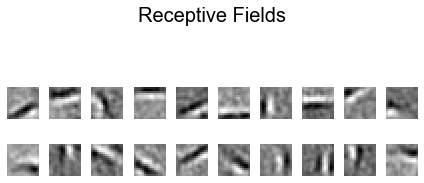

In [14]:
plot_receptive_fields(model_20.Phi.T)

In [15]:
# Simulation constants
num_units = 100 # number of neurons (units)

# Define model
model_100 = OlshausenField1996Model(num_inputs=patch_size**2, 
                                num_units=num_units,
                                batch_size=batch_size,
                                lmda=lmda)

In [ ]:
# Run simulation
error_list = [] # List to save errors
for iter_ in tqdm(range(num_iter)):
    patches = generate_patches(image_set, patch_size, batch_size) # Generating image patches
    error = model_100.train(patches) # train model with patches 

    error_list.append(model.calculate_total_error(error))
    # Print moving average error
    if iter_ % 100 == 99:  
        print("iter: "+str(iter_+1)+"/"+str(num_iter)+", Moving error:",
              np.mean(error_list[iter_-99:iter_]))

In [ ]:
plot_receptive_fields(model_100.Phi.T)

In [ ]:
# Simulation constants
num_units = 500 # number of neurons (units)

# Define model
model_500 = OlshausenField1996Model(num_inputs=patch_size**2, 
                                num_units=num_units,
                                batch_size=batch_size,
                                lmda=lmda)

In [ ]:
# Run simulation
error_list = [] # List to save errors
for iter_ in tqdm(range(num_iter)):
    patches = generate_patches(image_set, patch_size, batch_size) # Generating image patches
    error = model_500.train(patches) # train model with patches 

    error_list.append(model.calculate_total_error(error))
    # Print moving average error
    if iter_ % 100 == 99:  
        print("iter: "+str(iter_+1)+"/"+str(num_iter)+", Moving error:",
              np.mean(error_list[iter_-99:iter_]))

In [ ]:
plot_receptive_fields(model_500.Phi.T)

###: 4.2 Sparsity (`lmda`)

Generate receptive fields for networks of three sizes $\lambda = 50, 100, 200$ and compare the results. You should keep all other constants fixed to the defaults used in class.